In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting up Data
import tensorflow as tf
from sklearn import preprocessing
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES']='1' 
tf.reset_default_graph()
%matplotlib inline

In [2]:
#中冷后进气压力/进气量/ 中冷后进气温度/冷却水温度/ EGR阀开度/实测氧浓度/实测碳烟排放
data = pd.read_csv("data.csv")
data.head()
print(data.shape)

(149503, 7)


In [3]:
#删除97000--100000范围的数据
data['soot'][97000:100000] = -1
data_la = data[data['soot'] != -1]

In [4]:
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
#f = lambda x : 20 if x>20 else x
#data2 = data['soot'].map(f)
data_la['soot'] = data_la['soot'].apply( lambda x: 0.1 if x<0.2 else x)
#data_la['soot'] = data_la['soot'].apply( lambda x: 20 if x>20 else x)
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
#data_la['soot'] = data_la['soot'].apply( lambda x: 0.2 if (x < 0.3) & (x >0.1) else x)  
#data_la['soot'] = data_la['soot'].apply( lambda x: 0.15 if x<0.3 else x)

/data/anaconda3/envs/base_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.



 mu = 1.37 and sigma = 1.20



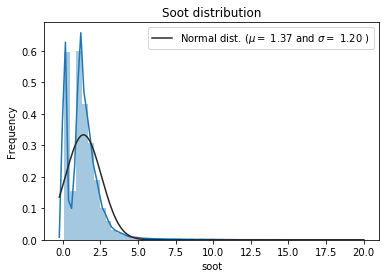

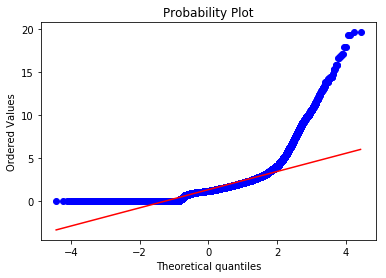

In [5]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data_la['soot'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_la['soot'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Soot distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_la['soot'], plot=plt)
plt.show()

/data/anaconda3/envs/base_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until



 mu = 1.32 and sigma = 1.24



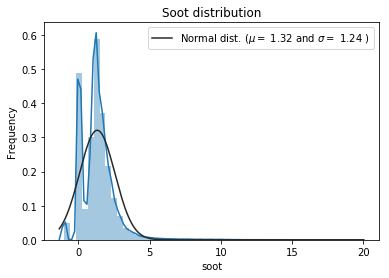

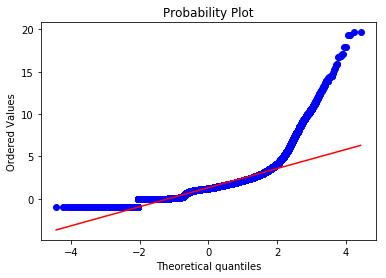

In [6]:
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data_la['soot'] = np.log1p(data_la['soot'])

#Check the new distribution 
sns.distplot(data['soot'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['soot'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Soot distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['soot'], plot=plt)
plt.show()

In [7]:
features =  data_la.columns.values[0:6]   
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
data = data_la
n_train_days = int(len(data)*0.8)
data = data
#前80% 天的数据作为训练数据
train = data[:n_train_days]

#最后20%天的数据作为测试数据
test = data[n_train_days:]


In [8]:
#设定输入输出
train_X, train_y = train[features].values, train['soot'].values

test_X, test_y = test[features].values, test['soot'].values

#数据转化为LSTM的输入数据类型（3D格式，【样本，时间步长，特征】）
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(117202, 1, 6) (117202,) (29301, 1, 6) (29301,)


Using TensorFlow backend.


Train on 117202 samples, validate on 29301 samples
Epoch 1/1000
 - 4s - loss: 0.1844 - val_loss: 0.1646
Epoch 2/1000
 - 0s - loss: 0.1625 - val_loss: 0.1497
Epoch 3/1000
 - 0s - loss: 0.1473 - val_loss: 0.1358
Epoch 4/1000
 - 0s - loss: 0.1338 - val_loss: 0.1233
Epoch 5/1000
 - 0s - loss: 0.1229 - val_loss: 0.1159
Epoch 6/1000
 - 0s - loss: 0.1164 - val_loss: 0.1104
Epoch 7/1000
 - 0s - loss: 0.1114 - val_loss: 0.1057
Epoch 8/1000
 - 0s - loss: 0.1069 - val_loss: 0.1018
Epoch 9/1000
 - 0s - loss: 0.1029 - val_loss: 0.0983
Epoch 10/1000
 - 0s - loss: 0.0996 - val_loss: 0.0954
Epoch 11/1000
 - 0s - loss: 0.0966 - val_loss: 0.0930
Epoch 12/1000
 - 0s - loss: 0.0940 - val_loss: 0.0909
Epoch 13/1000
 - 0s - loss: 0.0919 - val_loss: 0.0888
Epoch 14/1000
 - 0s - loss: 0.0901 - val_loss: 0.0871
Epoch 15/1000
 - 0s - loss: 0.0886 - val_loss: 0.0858
Epoch 16/1000
 - 0s - loss: 0.0873 - val_loss: 0.0845
Epoch 17/1000
 - 0s - loss: 0.0861 - val_loss: 0.0834
Epoch 18/1000
 - 0s - loss: 0.0851 - val

Epoch 151/1000
 - 0s - loss: 0.0689 - val_loss: 0.0665
Epoch 152/1000
 - 0s - loss: 0.0689 - val_loss: 0.0665
Epoch 153/1000
 - 0s - loss: 0.0689 - val_loss: 0.0665
Epoch 154/1000
 - 0s - loss: 0.0688 - val_loss: 0.0664
Epoch 155/1000
 - 0s - loss: 0.0688 - val_loss: 0.0663
Epoch 156/1000
 - 0s - loss: 0.0688 - val_loss: 0.0663
Epoch 157/1000
 - 0s - loss: 0.0687 - val_loss: 0.0663
Epoch 158/1000
 - 0s - loss: 0.0687 - val_loss: 0.0662
Epoch 159/1000
 - 0s - loss: 0.0687 - val_loss: 0.0662
Epoch 160/1000
 - 0s - loss: 0.0686 - val_loss: 0.0661
Epoch 161/1000
 - 0s - loss: 0.0686 - val_loss: 0.0661
Epoch 162/1000
 - 0s - loss: 0.0685 - val_loss: 0.0661
Epoch 163/1000
 - 0s - loss: 0.0685 - val_loss: 0.0661
Epoch 164/1000
 - 0s - loss: 0.0685 - val_loss: 0.0660
Epoch 165/1000
 - 0s - loss: 0.0685 - val_loss: 0.0660
Epoch 166/1000
 - 0s - loss: 0.0684 - val_loss: 0.0660
Epoch 167/1000
 - 0s - loss: 0.0684 - val_loss: 0.0659
Epoch 168/1000
 - 0s - loss: 0.0684 - val_loss: 0.0659
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 301/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 302/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 303/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 304/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 305/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 306/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 307/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 308/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 309/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 310/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 311/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 312/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 313/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 314/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 315/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 316/1000
 - 0s - loss: 0.0665 - val_loss: 0.0644
Epoch 317/1000
 - 0s - loss: 0.0665 - val_loss: 0.0643
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 450/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 451/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 452/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 453/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 454/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 455/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 456/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 457/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 458/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 459/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 460/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 461/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 462/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 463/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 464/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 465/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 466/1000
 - 0s - loss: 0.0660 - val_loss: 0.0638
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 599/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 600/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 601/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 602/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 603/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 604/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 605/1000
 - 0s - loss: 0.0658 - val_loss: 0.0636
Epoch 606/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 607/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 608/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 609/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 610/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 611/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 612/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 613/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 614/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 615/1000
 - 0s - loss: 0.0658 - val_loss: 0.0635
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 748/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 749/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 750/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 751/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 752/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 753/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 754/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 755/1000
 - 0s - loss: 0.0655 - val_loss: 0.0630
Epoch 756/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 757/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 758/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 759/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 760/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 761/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 762/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 763/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 764/1000
 - 0s - loss: 0.0655 - val_loss: 0.0629
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 897/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 898/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 899/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 900/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 901/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 902/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 903/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 904/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 905/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 906/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 907/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 908/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 909/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 910/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 911/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 912/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 913/1000
 - 0s - loss: 0.0653 - val_loss: 0.0629
Epoch 914/

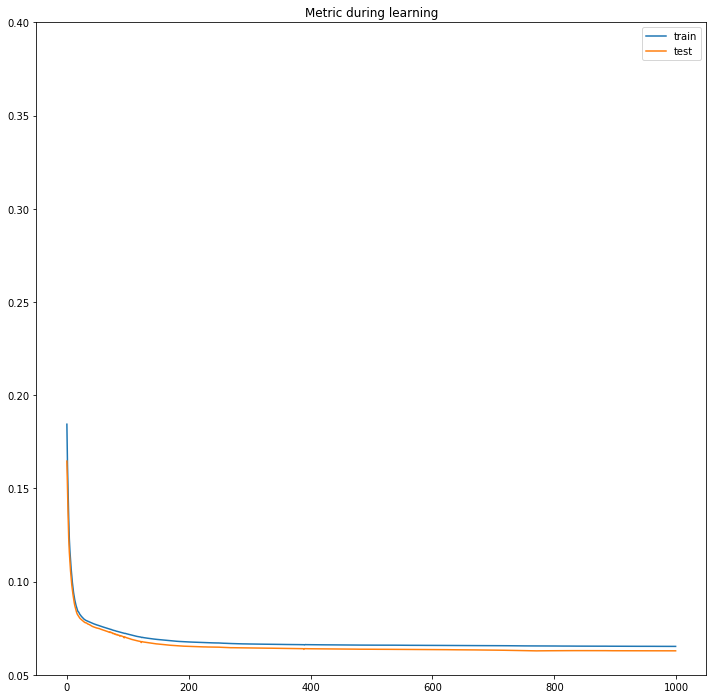

In [9]:
#设计网络结构

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense
import matplotlib.pyplot  as plt

#在第一个隐层中定义具有50个神经元的LSTM和用于预测close的
#输出层中的1个神经元，输入形状是1个时间步长，具有5个特征。
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

#使用平均绝对误差（MAE）损失函数。该模型将拟合50个批量大小为64的
#训练时期。通过在fit（）函数中设置validation_data参数来跟踪训练
#过程中的训练和测试失败
#epochs和batch_size调了好长时间效果一直不好
history = model.fit(train_X, train_y, epochs=1000, \
                    batch_size=3600, validation_data=(test_X, test_y),\
                    verbose=2, shuffle=False)

fig,ax = plt.subplots(figsize = (12,12))
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_ylim(0.05, 0.4)
plt.title('Metric during learning')
plt.legend()
plt.show()


In [10]:
#设计网络结构

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense
import matplotlib.pyplot  as plt

#在第一个隐层中定义具有50个神经元的LSTM和用于预测close的
#输出层中的1个神经元，输入形状是1个时间步长，具有5个特征。
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

#使用平均绝对误差（MAE）损失函数。该模型将拟合50个批量大小为64的
#训练时期。通过在fit（）函数中设置validation_data参数来跟踪训练
#过程中的训练和测试失败
#epochs和batch_size调了好长时间效果一直不好
history = model.fit(train_X, train_y, epochs=500, \
                    batch_size=3600, validation_data=(test_X, test_y),\
                    verbose=2, shuffle=False)

Train on 117202 samples, validate on 29301 samples
Epoch 1/500
 - 1s - loss: 0.4013 - val_loss: 0.3161
Epoch 2/500
 - 0s - loss: 0.3129 - val_loss: 0.3085
Epoch 3/500
 - 0s - loss: 0.3055 - val_loss: 0.3017
Epoch 4/500
 - 0s - loss: 0.2986 - val_loss: 0.2945
Epoch 5/500
 - 0s - loss: 0.2894 - val_loss: 0.2839
Epoch 6/500
 - 0s - loss: 0.2776 - val_loss: 0.2698
Epoch 7/500
 - 0s - loss: 0.2628 - val_loss: 0.2548
Epoch 8/500
 - 0s - loss: 0.2489 - val_loss: 0.2420
Epoch 9/500
 - 0s - loss: 0.2366 - val_loss: 0.2305
Epoch 10/500
 - 0s - loss: 0.2268 - val_loss: 0.2219
Epoch 11/500
 - 0s - loss: 0.2192 - val_loss: 0.2152
Epoch 12/500
 - 0s - loss: 0.2128 - val_loss: 0.2096
Epoch 13/500
 - 0s - loss: 0.2073 - val_loss: 0.2046
Epoch 14/500
 - 0s - loss: 0.2024 - val_loss: 0.2017
Epoch 15/500
 - 0s - loss: 0.1987 - val_loss: 0.1981
Epoch 16/500
 - 0s - loss: 0.1953 - val_loss: 0.1872
Epoch 17/500
 - 0s - loss: 0.1920 - val_loss: 0.1832
Epoch 18/500
 - 0s - loss: 0.1909 - val_loss: 0.1887
Epoc

Epoch 154/500
 - 0s - loss: 0.1693 - val_loss: 0.1683
Epoch 155/500
 - 0s - loss: 0.1694 - val_loss: 0.1683
Epoch 156/500
 - 0s - loss: 0.1693 - val_loss: 0.1683
Epoch 157/500
 - 0s - loss: 0.1693 - val_loss: 0.1682
Epoch 158/500
 - 0s - loss: 0.1692 - val_loss: 0.1682
Epoch 159/500
 - 0s - loss: 0.1692 - val_loss: 0.1680
Epoch 160/500
 - 0s - loss: 0.1690 - val_loss: 0.1681
Epoch 161/500
 - 0s - loss: 0.1690 - val_loss: 0.1678
Epoch 162/500
 - 0s - loss: 0.1689 - val_loss: 0.1682
Epoch 163/500
 - 0s - loss: 0.1690 - val_loss: 0.1678
Epoch 164/500
 - 0s - loss: 0.1687 - val_loss: 0.1680
Epoch 165/500
 - 0s - loss: 0.1689 - val_loss: 0.1677
Epoch 166/500
 - 0s - loss: 0.1687 - val_loss: 0.1679
Epoch 167/500
 - 0s - loss: 0.1687 - val_loss: 0.1677
Epoch 168/500
 - 0s - loss: 0.1686 - val_loss: 0.1680
Epoch 169/500
 - 0s - loss: 0.1688 - val_loss: 0.1675
Epoch 170/500
 - 0s - loss: 0.1685 - val_loss: 0.1677
Epoch 171/500
 - 0s - loss: 0.1687 - val_loss: 0.1677
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1658 - val_loss: 0.1649
Epoch 307/500
 - 0s - loss: 0.1658 - val_loss: 0.1649
Epoch 308/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 309/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 310/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 311/500
 - 0s - loss: 0.1658 - val_loss: 0.1648
Epoch 312/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 313/500
 - 0s - loss: 0.1659 - val_loss: 0.1648
Epoch 314/500
 - 0s - loss: 0.1657 - val_loss: 0.1647
Epoch 315/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 316/500
 - 0s - loss: 0.1656 - val_loss: 0.1647
Epoch 317/500
 - 0s - loss: 0.1657 - val_loss: 0.1648
Epoch 318/500
 - 0s - loss: 0.1656 - val_loss: 0.1647
Epoch 319/500
 - 0s - loss: 0.1658 - val_loss: 0.1647
Epoch 320/500
 - 0s - loss: 0.1655 - val_loss: 0.1647
Epoch 321/500
 - 0s - loss: 0.1658 - val_loss: 0.1647
Epoch 322/500
 - 0s - loss: 0.1655 - val_loss: 0.1647
Epoch 323/500
 - 0s - loss: 0.1657 - val_loss: 0.1646
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1643 - val_loss: 0.1636
Epoch 459/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 460/500
 - 0s - loss: 0.1642 - val_loss: 0.1636
Epoch 461/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 462/500
 - 0s - loss: 0.1642 - val_loss: 0.1636
Epoch 463/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 464/500
 - 0s - loss: 0.1642 - val_loss: 0.1636
Epoch 465/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 466/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 467/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 468/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 469/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 470/500
 - 0s - loss: 0.1641 - val_loss: 0.1634
Epoch 471/500
 - 0s - loss: 0.1641 - val_loss: 0.1635
Epoch 472/500
 - 0s - loss: 0.1640 - val_loss: 0.1635
Epoch 473/500
 - 0s - loss: 0.1642 - val_loss: 0.1635
Epoch 474/500
 - 0s - loss: 0.1640 - val_loss: 0.1634
Epoch 475/500
 - 0s - loss: 0.1641 - val_loss: 0.1636
Epoch 476/500
 - 0s - loss: 

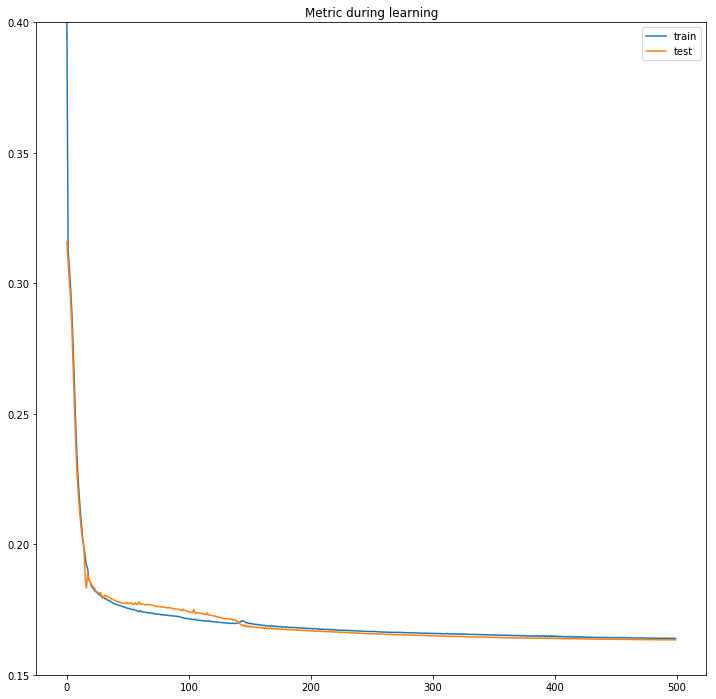

In [11]:
fig,ax = plt.subplots(figsize = (12,12))
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_ylim(0.15, 0.4)
plt.title('Metric during learning')
plt.legend()
plt.show()


In [12]:
#计算预测值和实际值之间的均方根误差
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
test = pd.read_csv('test.csv')
test = test.values
test = test.reshape((test.shape[0], 1, test.shape[1]))
predictions = model.predict(test)
rnn_pred = np.expm1(predictions)

In [13]:
rnn_pred = rnn_pred.reshape(3661)

In [15]:
sub = pd.DataFrame()
sub['soot'] = rnn_pred
sub.to_csv('submission_mae.csv',index=False)